In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows: 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示异常

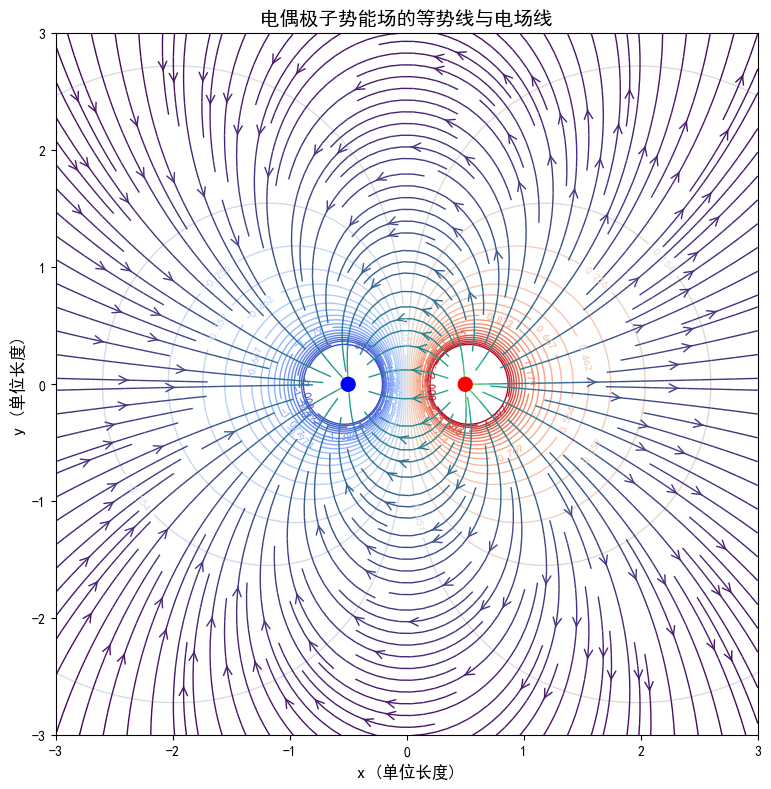

In [6]:
q = 1.0            # 点电荷量（任意单位）
d = 1.0            # 正负电荷之间的距离
# 两个电荷的位置
pos_plus  = np.array([+d/2, 0.0])
pos_minus = np.array([-d/2, 0.0])

def potential(x, y):
    dxp, dyp = x - pos_plus[0],  y - pos_plus[1]
    dxm, dym = x - pos_minus[0], y - pos_minus[1]
    r_plus  = np.hypot(dxp, dyp)
    r_minus = np.hypot(dxm, dym)
    return q/r_plus - q/r_minus

def electric_field(x, y):
    dxp, dyp = x - pos_plus[0],  y - pos_plus[1]
    dxm, dym = x - pos_minus[0], y - pos_minus[1]
    r3_plus  = (dxp**2 + dyp**2)**1.5
    r3_minus = (dxm**2 + dym**2)**1.5
    Ex = q * ( dxp/r3_plus - dxm/r3_minus )
    Ey = q * ( dyp/r3_plus - dym/r3_minus )
    return Ex, Ey

nx, ny = 200, 200
x = np.linspace(-3*d, 3*d, nx)
y = np.linspace(-3*d, 3*d, ny)
X, Y = np.meshgrid(x, y)

# 计算电势和电场
Phi = potential(X, Y)
Ex, Ey = electric_field(X, Y)

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

# 等势线
levels = np.linspace(-2*q/d, 2*q/d, 40)
contours = ax.contour(X, Y, Phi, levels=levels, cmap='coolwarm', linewidths=1)
ax.clabel(contours, inline=1, fontsize=8)

# 电场线 (流线图)
color = np.log(np.hypot(Ex, Ey))
ax.streamplot(
    x, y, Ex, Ey,
    color=color, density=2,
    cmap='viridis', linewidth=1,
    arrowstyle='->', arrowsize=1.5
)

# 标记电荷位置
ax.scatter([pos_plus[0], pos_minus[0]],
           [pos_plus[1], pos_minus[1]],
           c=['red','blue'], s=100, zorder=5, marker='o',
           label='点电荷')

# 坐标与图例
ax.set_title("电偶极子势能场的等势线与电场线", fontsize=14)
ax.set_xlabel("x (单位长度)", fontsize=12)
ax.set_ylabel("y (单位长度)", fontsize=12)
ax.set_aspect('equal')
ax.set_xlim(-3*d, 3*d)
ax.set_ylim(-3*d, 3*d)
plt.tight_layout()
plt.savefig('./output/dipole.png', dpi=300)
plt.show()

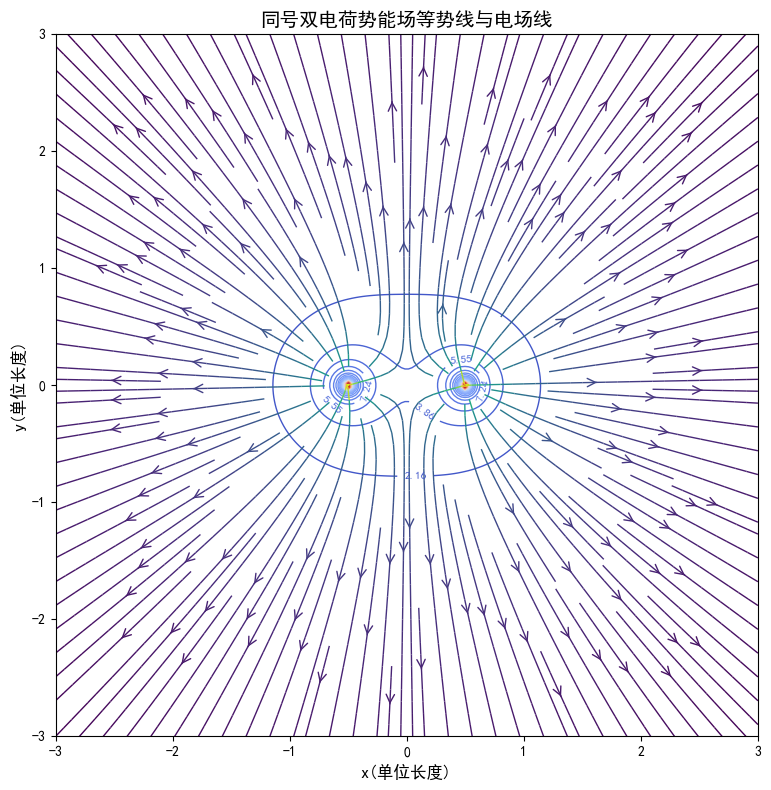

In [8]:
import numpy as np
import matplotlib.pyplot as plt

q = 1.0            # 同号电荷量
d = 1.0            # 两电荷间距
pos_plus  = np.array([+d/2, 0.0])
pos_minus = np.array([-d/2, 0.0])

def potential_same(x, y):
    dxp, dyp = x - pos_plus[0],  y - pos_plus[1]
    dxm, dym = x - pos_minus[0], y - pos_minus[1]
    r_plus  = np.hypot(dxp, dyp)
    r_minus = np.hypot(dxm, dym)
    return q/r_plus + q/r_minus

def electric_field_same(x, y):
    dxp, dyp = x - pos_plus[0],  y - pos_plus[1]
    dxm, dym = x - pos_minus[0], y - pos_minus[1]
    r3_plus  = (dxp**2 + dyp**2)**1.5
    r3_minus = (dxm**2 + dym**2)**1.5
    Ex = q * ( dxp/r3_plus + dxm/r3_minus )
    Ey = q * ( dyp/r3_plus + dym/r3_minus )
    return Ex, Ey


nx, ny = 200, 200
x = np.linspace(-3*d, 3*d, nx)
y = np.linspace(-3*d, 3*d, ny)
X, Y = np.meshgrid(x, y)

Phi = potential_same(X, Y)
Ex, Ey = electric_field_same(X, Y)


fig, ax = plt.subplots(figsize=(8,8))

# 等势线
levels = np.linspace(np.min(Phi), np.max(Phi), 40)
contours = ax.contour(X, Y, Phi, levels=levels, cmap='coolwarm', linewidths=1)
ax.clabel(contours, inline=1, fontsize=8)

# 电场线
color = np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, density=2,
              cmap='viridis', linewidth=1,
              arrowstyle='->', arrowsize=1.5)

# 标记电荷位置
ax.scatter([pos_plus[0], pos_minus[0]],
           [pos_plus[1], pos_minus[1]],
           c='red', s=100, marker='o', label='同号电荷')

ax.set_title("同号双电荷势能场等势线与电场线", fontsize=14)
ax.set_xlabel("x(单位长度)", fontsize=12)
ax.set_ylabel("y(单位长度)", fontsize=12)
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig('./output/dipole_same.png', dpi=300)
plt.show()


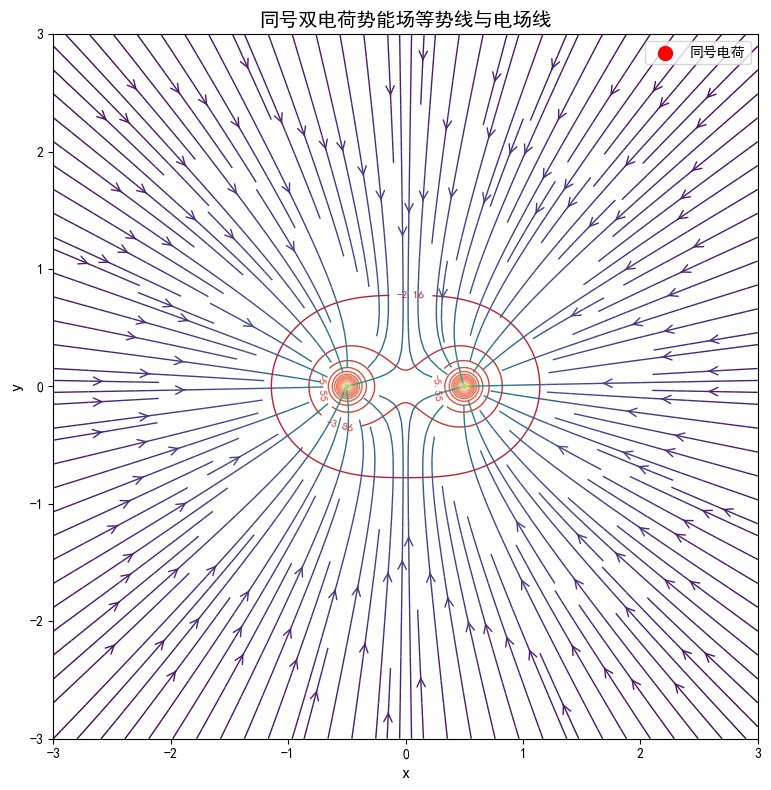

In [5]:
import numpy as np
import matplotlib.pyplot as plt


q = -1.0           # 同号电荷量
d = 1.0            # 两电荷间距
pos_plus  = np.array([+d/2, 0.0])
pos_minus = np.array([-d/2, 0.0])


def potential_same(x, y):
    dxp, dyp = x - pos_plus[0],  y - pos_plus[1]
    dxm, dym = x - pos_minus[0], y - pos_minus[1]
    r_plus  = np.hypot(dxp, dyp)
    r_minus = np.hypot(dxm, dym)
    return q/r_plus + q/r_minus

def electric_field_same(x, y):
    dxp, dyp = x - pos_plus[0],  y - pos_plus[1]
    dxm, dym = x - pos_minus[0], y - pos_minus[1]
    r3_plus  = (dxp**2 + dyp**2)**1.5
    r3_minus = (dxm**2 + dym**2)**1.5
    Ex = q * ( dxp/r3_plus + dxm/r3_minus )
    Ey = q * ( dyp/r3_plus + dym/r3_minus )
    return Ex, Ey


nx, ny = 200, 200
x = np.linspace(-3*d, 3*d, nx)
y = np.linspace(-3*d, 3*d, ny)
X, Y = np.meshgrid(x, y)

Phi = potential_same(X, Y)
Ex, Ey = electric_field_same(X, Y)


fig, ax = plt.subplots(figsize=(8,8))

# 等势线
levels = np.linspace(np.min(Phi), np.max(Phi), 40)
contours = ax.contour(X, Y, Phi, levels=levels, cmap='coolwarm', linewidths=1)
ax.clabel(contours, inline=1, fontsize=8)

# 电场线
color = np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, density=2,
              cmap='viridis', linewidth=1,
              arrowstyle='->', arrowsize=1.5)

# 标记电荷位置
ax.scatter([pos_plus[0], pos_minus[0]],
           [pos_plus[1], pos_minus[1]],
           c='red', s=100, marker='o', label='同号电荷')

ax.set_title("同号双电荷势能场等势线与电场线", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_aspect('equal')
ax.legend()
plt.tight_layout()
plt.show()


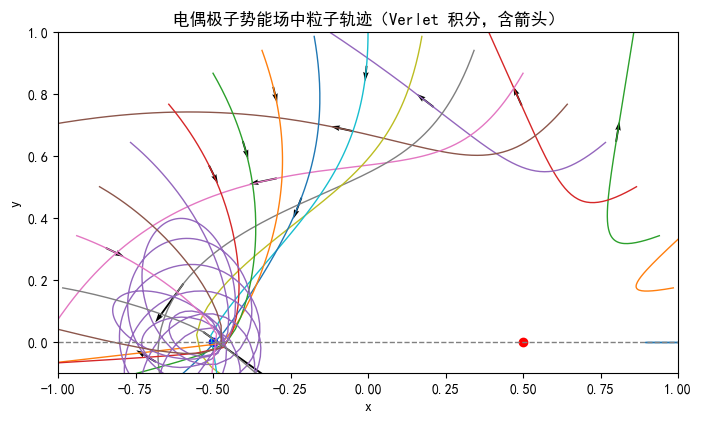

In [38]:
import numpy as np
import matplotlib.pyplot as plt


q = 1.0         # 点电荷量
d = 1.0         # 电荷间距
r_plus  = np.array([+d/2, 0.0])
r_minus = np.array([-d/2, 0.0])


def electric_field(r):
    r_p = r - r_plus
    r_m = r - r_minus
    r_p_norm = np.linalg.norm(r_p)
    r_m_norm = np.linalg.norm(r_m)
    E = q * (r_p / r_p_norm**3 - r_m / r_m_norm**3)
    return E


dt = 0.01       # 时间步长
steps = 1000    # 总步数
v0 = 1.0        # 初始速度
R = 1.0         # 初始位置圆半径


angles = np.linspace(0, np.pi, 18, endpoint=False)
trajectories = []

for theta in angles:
    # 初始位置和速度
    r = np.array([R * np.cos(theta), R * np.sin(theta)])
    v = -v0 * r / np.linalg.norm(r)
    traj = [r.copy()]
    
    for _ in range(steps):
        a = electric_field(r)
        r_new = r + v * dt + 0.5 * a * dt**2
        a_new = electric_field(r_new)
        v = v + 0.5 * (a + a_new) * dt
        r = r_new
        traj.append(r.copy())
        
        # 如果粒子远离中心区域，停止模拟
        if np.linalg.norm(r) > 10 * R or np.linalg.norm(r) < 0.1 * R:
            break
    
    trajectories.append(np.array(traj))


fig, ax = plt.subplots(figsize=(8, 8))

# 绘制电荷位置
ax.plot(r_plus[0], r_plus[1], 'ro', label='正电荷')
ax.plot(r_minus[0], r_minus[1], 'bo', label='负电荷')

# 绘制轨迹并添加箭头
for traj in trajectories:
    ax.plot(traj[:,0], traj[:,1], lw=1)
    # 在轨迹中取 40% 处添加箭头
    arrow_idx = int(len(traj) * 0.1)
    if arrow_idx < len(traj) - 1:
        start = traj[arrow_idx]
        end   = traj[arrow_idx + 1]
        vec   = end - start
        # 放大箭头长度以便可见
        scale = 5
        ax.quiver(start[0], start[1],
                  vec[0]*scale, vec[1]*scale,
                  angles='xy', scale_units='xy', scale=1, color='k', width=0.003)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('电偶极子势能场中粒子轨迹')
ax.set_aspect('equal')
plt.xlim(-1,1)
plt.ylim(-0.1,1)
plt.axline([-1,0], [0,0], color='gray', lw=1, ls='--')
plt.savefig('./output/electrostatic_trajectory_half_cycle.png', dpi=300)
plt.show()

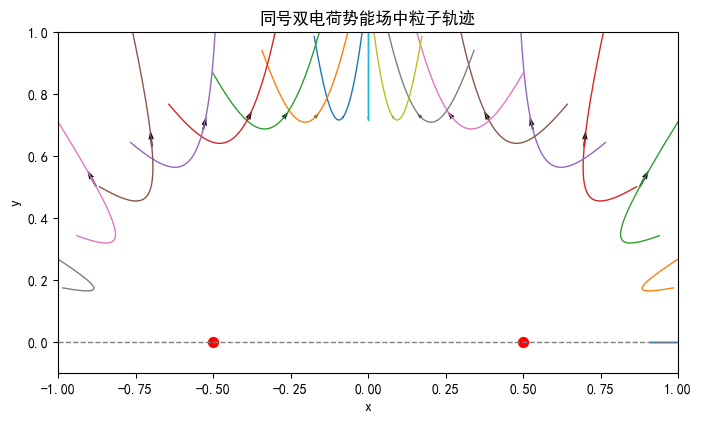

In [40]:
import numpy as np
import matplotlib.pyplot as plt


q = 1.0         # 点电荷量
d = 1.0         # 电荷间距
# 两个同号电荷的位置
r_plus  = np.array([+d/2, 0.0])
r_minus = np.array([-d/2, 0.0])


def electric_field(r):
    r_p = r - r_plus
    r_m = r - r_minus
    r_p_norm = np.linalg.norm(r_p)
    r_m_norm = np.linalg.norm(r_m)
    # 同号电荷，场强向量叠加
    E = q * ( r_p / r_p_norm**3 + r_m / r_m_norm**3 )
    return E


dt = 0.01       # 时间步长
steps = 1000    # 总步数
v0 = 1.0        # 初始速度
R = 1.0         # 入射初始圆半径


angles = np.linspace(0, np.pi, 18, endpoint=False)
trajectories = []

for theta in angles:
    r = np.array([R * np.cos(theta), R * np.sin(theta)])
    v = -v0 * r / np.linalg.norm(r)
    traj = [r.copy()]
    
    for _ in range(steps):
        a = electric_field(r)
        r_new = r + v * dt + 0.5 * a * dt**2
        a_new = electric_field(r_new)
        v = v + 0.5 * (a + a_new) * dt
        r = r_new
        traj.append(r.copy())
        
        if np.linalg.norm(r) > 10 * R or np.linalg.norm(r) < 0.1 * R:
            break
    
    trajectories.append(np.array(traj))


fig, ax = plt.subplots(figsize=(8, 8))

# 同号双电荷，用相同颜色或标记突出
ax.scatter(r_plus[0], r_plus[1], c='red',  s=50, label='同号电荷 1')
ax.scatter(r_minus[0], r_minus[1], c='red', s=50, label='同号电荷 2')

for traj in trajectories:
    ax.plot(traj[:,0], traj[:,1], lw=1)
    # 添加箭头
    arrow_idx = int(len(traj) * 0.1)
    if arrow_idx < len(traj) - 1:
        start = traj[arrow_idx]
        end   = traj[arrow_idx + 1]
        vec   = (end - start) * 5
        ax.quiver(start[0], start[1], vec[0], vec[1],
                  angles='xy', scale_units='xy', scale=1,
                  color='k', width=0.003)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('同号双电荷势能场中粒子轨迹')
ax.set_aspect('equal')
plt.xlim(-1,1)
plt.ylim(-0.1,1)
plt.axline([-1,0], [0,0], color='gray', lw=1, ls='--')
plt.show()


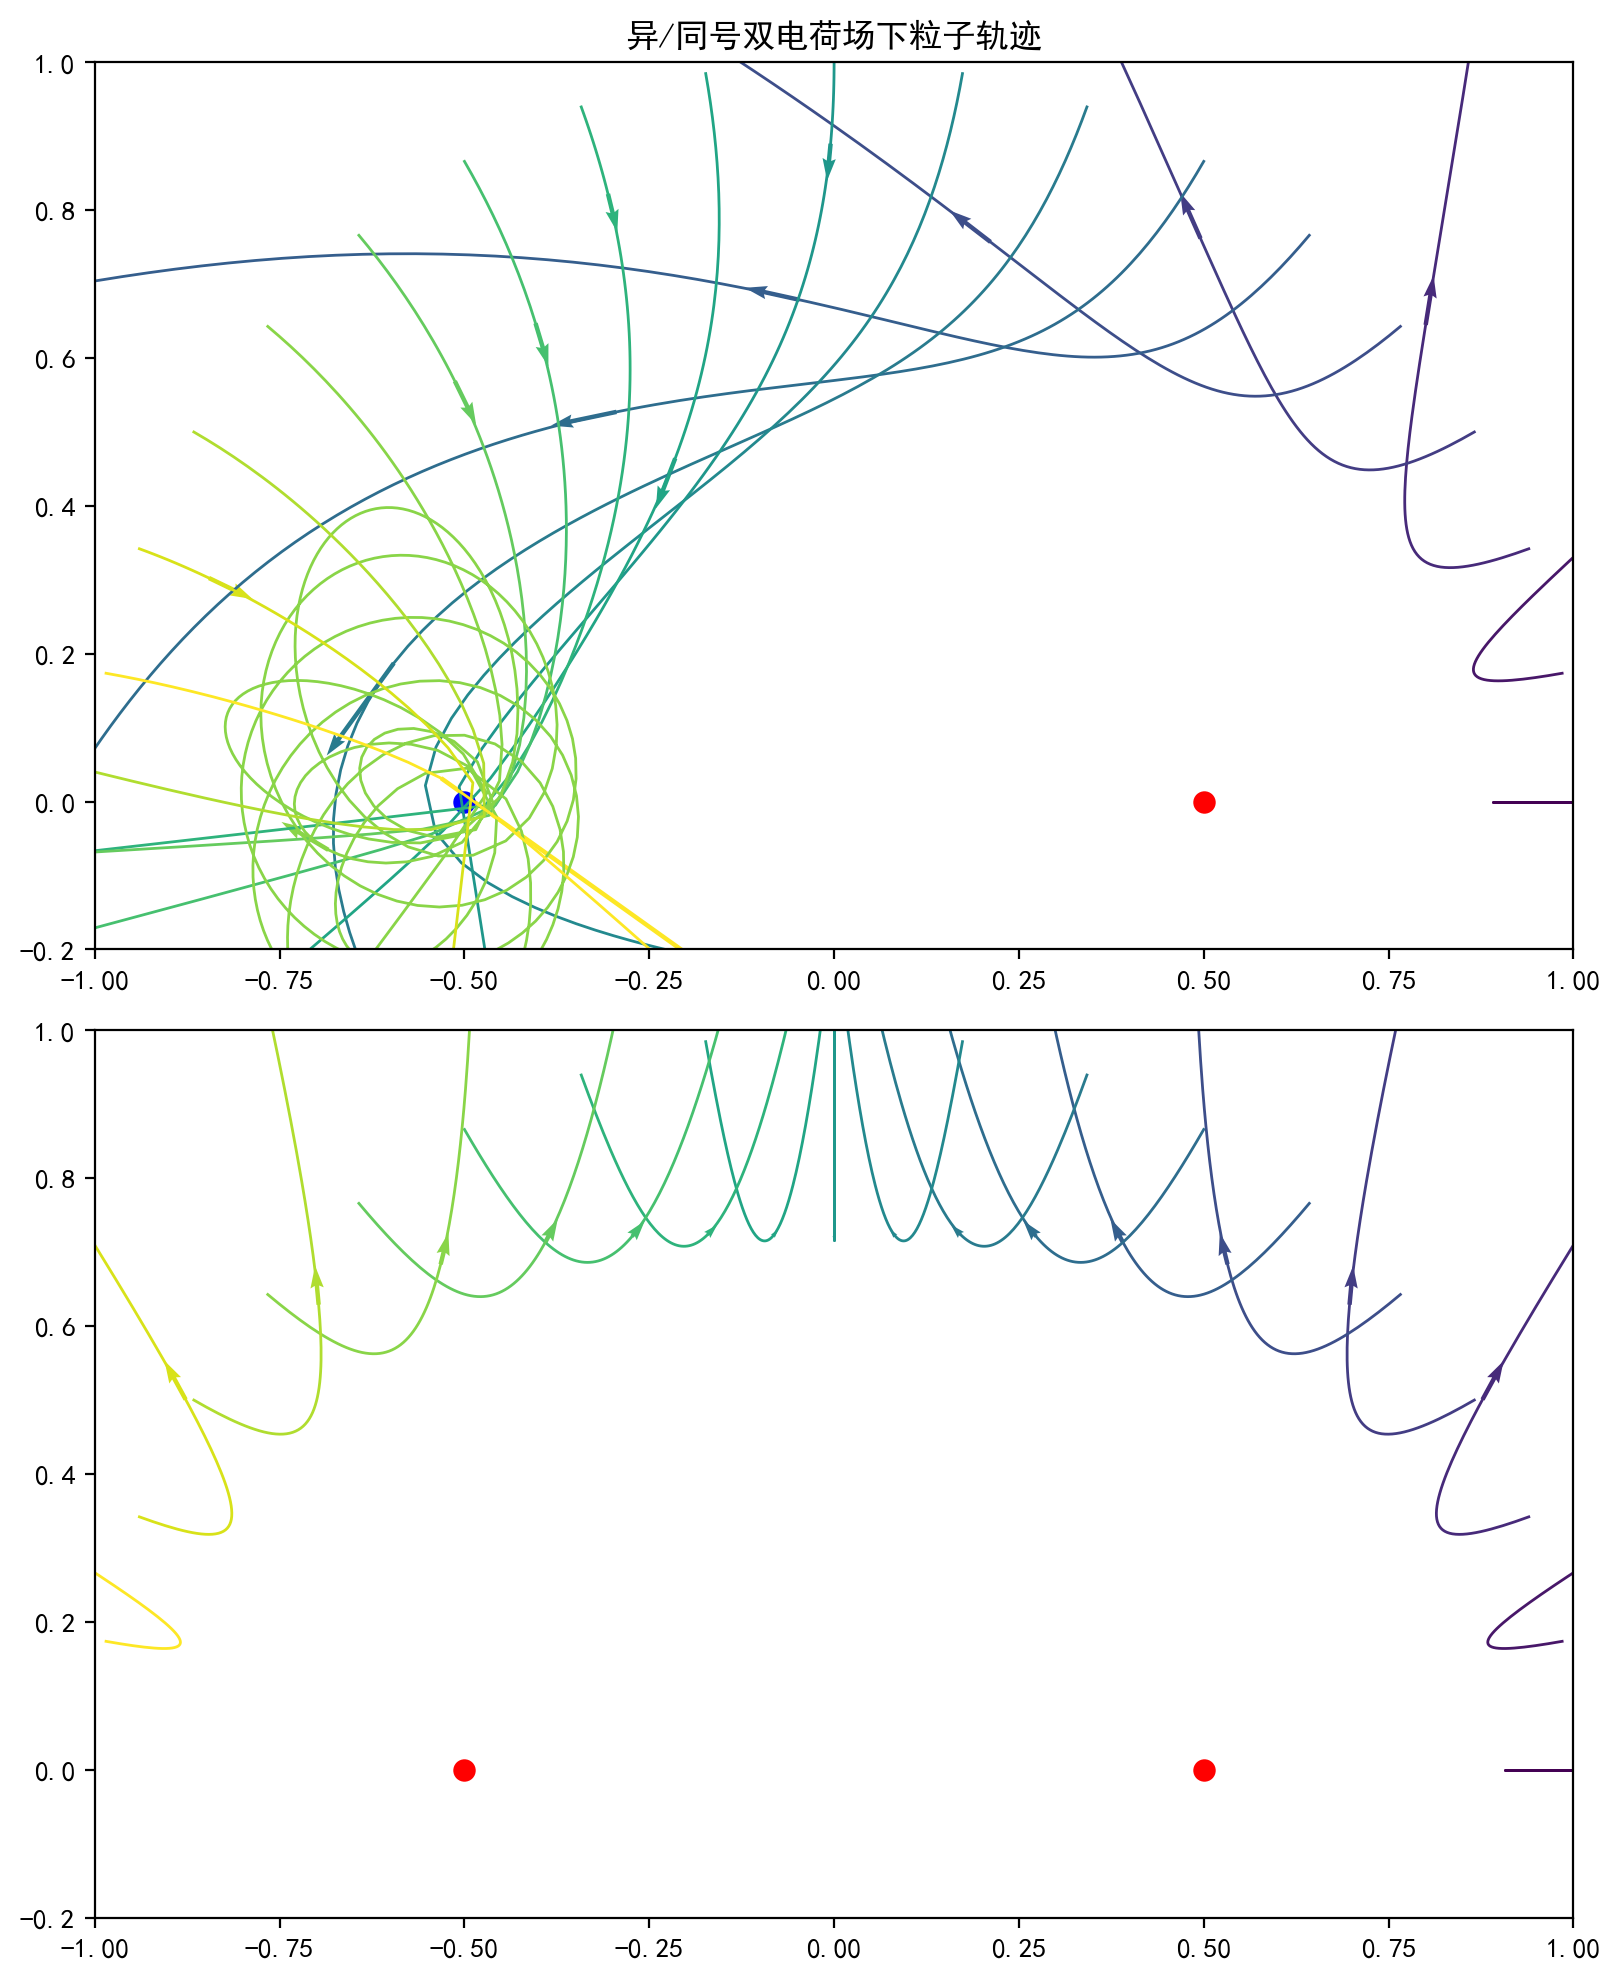

In [55]:
import numpy as np
import matplotlib.pyplot as plt


q = 1.0
d = 1.0
r_plus  = np.array([+d/2, 0.0])
r_minus = np.array([-d/2, 0.0])

dt = 0.01
steps = 1000
v0 = 1.0
R = 1.0
angles = np.linspace(0, np.pi, 18, endpoint=False)


def electric_field_dipole(r):
    r_p = r - r_plus
    r_m = r - r_minus
    return q * (r_p/np.linalg.norm(r_p)**3 - r_m/np.linalg.norm(r_m)**3)

def electric_field_same(r):
    r_p = r - r_plus
    r_m = r - r_minus
    return q * (r_p/np.linalg.norm(r_p)**3 + r_m/np.linalg.norm(r_m)**3)


def simulate(field_func):
    trajs = []
    for theta in angles:
        r = np.array([R*np.cos(theta), R*np.sin(theta)])
        v = -v0 * r/np.linalg.norm(r)
        traj = [r.copy()]
        for _ in range(steps):
            a = field_func(r)
            r_new = r + v*dt + 0.5*a*dt**2
            a_new = field_func(r_new)
            v = v + 0.5*(a + a_new)*dt
            r = r_new
            traj.append(r.copy())
            if np.linalg.norm(r) > 10*R or np.linalg.norm(r) < 0.1*R:
                break
        trajs.append(np.array(traj))
    return trajs

trajs_dipole = simulate(electric_field_dipole)
trajs_same   = simulate(electric_field_same)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), dpi=200)

# 准备颜色映射
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(angles)))

# 子图1：异号偶极子
for idx, traj in enumerate(trajs_dipole):
    ax1.plot(traj[:,0], traj[:,1], color=colors[idx], lw=1,
             label=f'{np.degrees(angles[idx]):.0f}°' if idx==0 else "")
    # 箭头
    i = int(len(traj)*0.1)
    if i < len(traj)-1:
        dx, dy = (traj[i+1]-traj[i])*5
        ax1.quiver(traj[i,0], traj[i,1], dx, dy,
                   angles='xy', scale_units='xy', scale=1,
                   color=colors[idx], width=0.003)
ax1.scatter(*r_plus, color='red',  s=50, label='正电荷')
ax1.scatter(*r_minus, color='blue', s=50, label='负电荷')
ax1.set_title('异/同号双电荷场下粒子轨迹')
ax1.set_xlim(-1,1); ax1.set_ylim(-0.2,1); ax1.set_aspect('equal')

# 子图2：同号双电荷
for idx, traj in enumerate(trajs_same):
    ax2.plot(traj[:,0], traj[:,1], color=colors[idx], lw=1)
    i = int(len(traj)*0.1)
    if i < len(traj)-1:
        dx, dy = (traj[i+1]-traj[i])*5
        ax2.quiver(traj[i,0], traj[i,1], dx, dy,
                   angles='xy', scale_units='xy', scale=1,
                   color=colors[idx], width=0.003)
ax2.scatter(*r_plus, color='red',  s=50, label='电荷1')
ax2.scatter(*r_minus, color='red', s=50, label='电荷2')
ax2.set_xlim(-1,1); ax2.set_ylim(-0.2,1); ax2.set_aspect('equal')
ax2.legend().set_visible(False)  # 轨迹已用颜色区分，无需重复图例

plt.tight_layout()
plt.savefig('./output/verlet_dipole.png')
plt.show()
